In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pwd

'/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/practice'

In [7]:
logs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/practice/data/3_logs.csv')
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [13]:
user_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/practice/data/3_user_data.csv')
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [16]:
logs['platform'].nunique()

3

In [70]:
# Find client IDs with the most successful operations

logs_client_success = logs. \
    query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success': 'sum'}) \
    .sort_values(by='client')

logs_max_success = logs_client_success['success'].max()

top_clients = logs_client_success.query('success == {}'.format(logs_max_success))['client'].array
top_clients

<PandasArray>
[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]
Length: 9, dtype: int64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


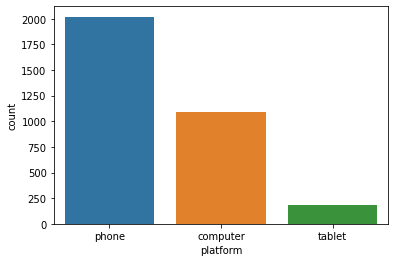

In [77]:
# Find platform with the most successful operations
sns.countplot(logs.query('success == True')['platform'])

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


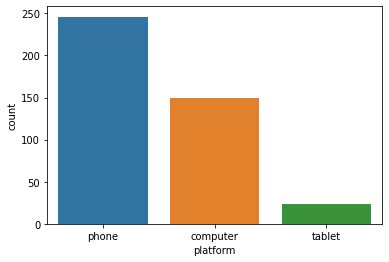

In [111]:
logs_users = logs.merge(user_data, on='client')
logs_users
sns.countplot(logs_users.query('premium == True')['platform'])

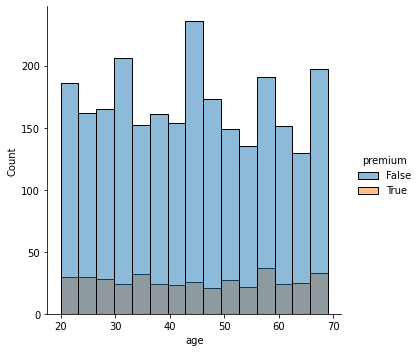

In [87]:
sns.displot(data=user_data, x='age', hue='premium')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


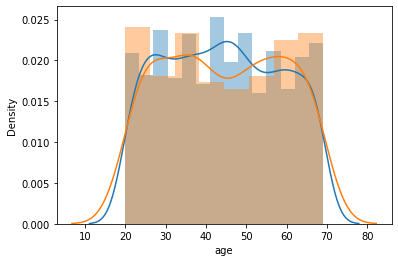

In [98]:
# Draw charts for 2 categories of data overkaying each other
sns.distplot(user_data.query('premium == False').age)
sns.distplot(user_data.query('premium').age)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


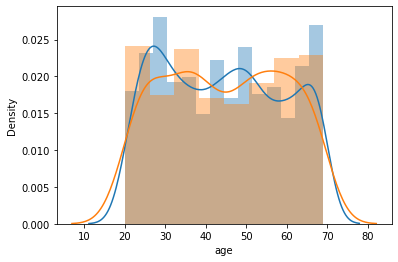

In [99]:
sns.distplot(logs_users.query('premium == False').age)
sns.distplot(logs_users.query('premium').age)

In [101]:
logs_users

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [104]:
logs_client_success

,client,success
0,40,1
1,50,1
2,75,1
3,81,1
4,132,1
...,...,...
2840,99926,1
2841,99927,1
2842,99931,1
2843,99973,1


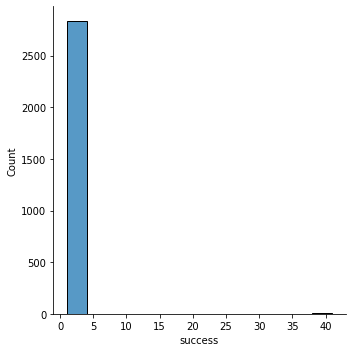

In [110]:
sns.displot(logs_client_success.success)

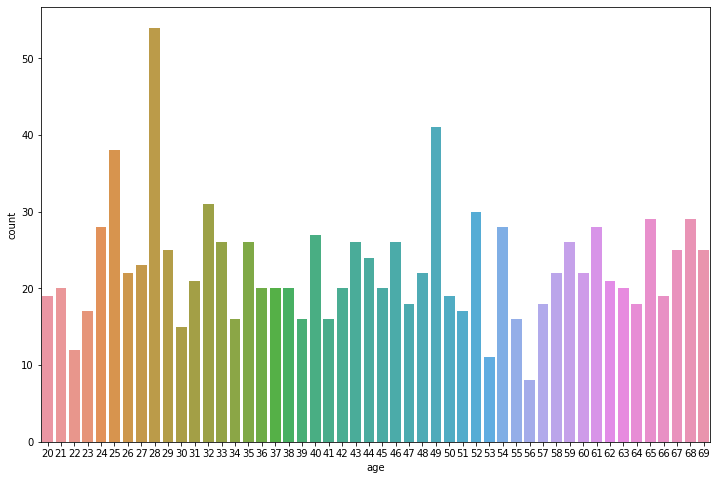

In [129]:
# Use countplot to quickly spot the age of users who made the most orders on computer platform

plt.figure(figsize=(12, 8))
sns.countplot(data=logs_users.query("platform == 'computer'"), x='age')